In [1]:
# Import necessary libraries for logistic regression project
import numpy as np               # Numerical operations
import pandas as pd              # Data manipulation
import matplotlib.pyplot as plt   # Data visualization (plots)
import seaborn as sns            # Data visualization (seaborn)
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LogisticRegression    # Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from sklearn.metrics import roc_curve, auc             # ROC curve metrics
import statsmodels.api as sm      # For statistical analysis (optional, if needed)
import scipy.stats as stats

In [2]:
dataset_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"  # Replace with the dataset URL
dataset_path = "/content/lead_scoring_dataset.csv"


In [3]:
!wget -O {dataset_path} {dataset_url}

# Step 4: Load the dataset
data = pd.read_csv(dataset_path)

# Step 5: Explore the data (check first few rows)
data.head()

--2025-10-21 14:02:11--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘/content/lead_scoring_dataset.csv’

/content/lead_scori 100%[===================>]  78.98K  --.-KB/s    in 0.01s   

2025-10-21 14:02:11 (6.13 MB/s) - ‘/content/lead_scoring_dataset.csv’ saved [80876/80876]



,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df=data.copy()
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [8]:
df.shape

(1462, 9)

In [7]:
print("Missing values:\n", data.isnull().sum())


Missing values:
 lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [9]:
print("Data types:\n", data.dtypes)

Data types:
 lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object


In [11]:
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        data[column].fillna('NA', inplace=True)  # Replace missing values with 'NA'
    elif data[column].dtype in ['int64', 'float64']:  # Numerical column
        data[column].fillna(0.0, inplace=True)  # Replace missing values with 0.0 for numerical columns

# Step 2: Verify no missing values remain after imputation
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


/tmp/ipython-input-2337399024.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna('NA', inplace=True)  # Replace missing values with 'NA'
/tmp/ipython-input-2337399024.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [12]:

X = data.drop('converted', axis=1)
y = data['converted']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 877 samples
Validation set: 292 samples
Test set: 293 samples


In [14]:

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


print("X_train index reset:\n", X_train.head())
print("y_train index reset:\n", y_train.head())


X_train index reset:
       lead_source   industry  number_of_courses_viewed  annual_income  \
0  organic_search  education                         3        69033.0   
1  organic_search  education                         3            0.0   
2          events  education                         1        68118.0   
3    social_media    finance                         0        65044.0   
4        paid_ads         NA                         5        48327.0   

  employment_status       location  interaction_count  lead_score  
0     self_employed  north_america                  1        0.43  
1           student    middle_east                  0        0.52  
2           student  north_america                  7        0.87  
3     self_employed         africa                  5        0.53  
4          employed  north_america                  0        0.89  
y_train index reset:
 0    1
1    1
2    1
3    1
4    1
Name: converted, dtype: int64


In [18]:
from sklearn.metrics import roc_auc_score
import numpy as np

# List of numerical variables to check (make sure they exist in X_train)
numerical_columns = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

# Step 1: Compute AUC for each numerical variable
auc_scores = {}

for col in numerical_columns:
    # Step 1.1: Get the AUC score for each numerical feature (using the feature as prediction and 'converted' as ground truth)
    auc = roc_auc_score(y_train, X_train[col])

    # Step 1.2: If AUC < 0.5, negate the variable (invert the relationship)
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[col])  # Negate the variable

    # Step 1.3: Store the AUC score for the feature
    auc_scores[col] = auc

# Step 2: Display the AUC scores for each numerical feature
print("AUC scores for numerical features:")
for col, auc in auc_scores.items():
    print(f"{col}: {auc:.4f}")

# Step 3: Find the feature with the highest AUC
best_feature = max(auc_scores, key=auc_scores.get)
print(f"\nFeature with highest AUC: {best_feature} with AUC = {auc_scores[best_feature]:.4f}")


AUC scores for numerical features:
number_of_courses_viewed: 0.7652
annual_income: 0.5446
interaction_count: 0.7272
lead_score: 0.6111

Feature with highest AUC: number_of_courses_viewed with AUC = 0.7652


In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [20]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']


In [21]:
train_dicts = X_train[categorical + numerical].to_dict(orient='records')


In [22]:
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)

In [23]:
val_dicts = X_val[categorical + numerical].to_dict(orient='records')

In [24]:
X_val_encoded = dv.transform(val_dicts)

In [25]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [26]:
y_val_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

In [27]:
auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC on the validation dataset: {auc:.3f}")

AUC on the validation dataset: 0.794


In [29]:
from sklearn.metrics import precision_score, recall_score
thresholds = np.arange(0.0, 1.01, 0.01)


precisions = []
recalls = []


for threshold in thresholds:

    y_val_pred_bin = (y_val_pred_proba >= threshold).astype(int)


    precision = precision_score(y_val, y_val_pred_bin)
    recall = recall_score(y_val, y_val_pred_bin)


    precisions.append(precision)
    recalls.append(recall)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


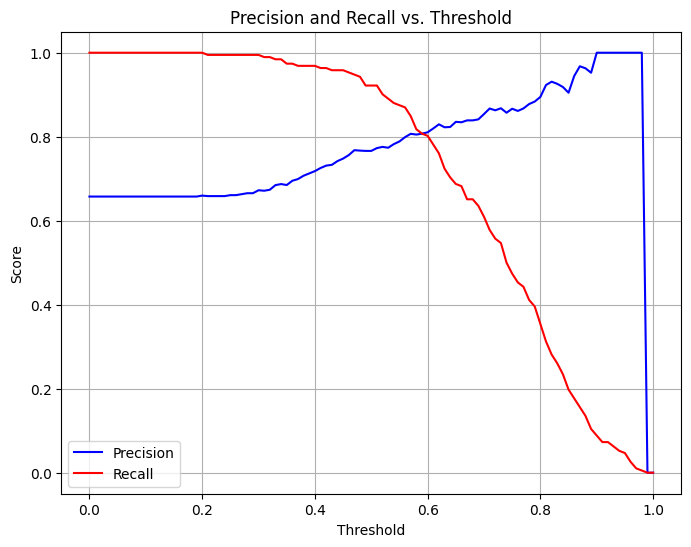

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import f1_score

In [33]:
f1_scores = []

# Step 2: Compute precision, recall, and F1 score for each threshold
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_val_pred_bin = (y_val_pred_proba >= threshold).astype(int)

    # Calculate precision and recall
    precision = precision_score(y_val, y_val_pred_bin, zero_division=0)
    recall = recall_score(y_val, y_val_pred_bin, zero_division=0)

    # Check if both precision and recall are greater than zero
    if precision + recall > 0:
        # Calculate F1 score if both precision and recall are non-zero
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        # Assign F1 score of 0 if either precision or recall is zero
        f1 = 0

    # Append F1 score to the list
    f1_scores.append(f1)



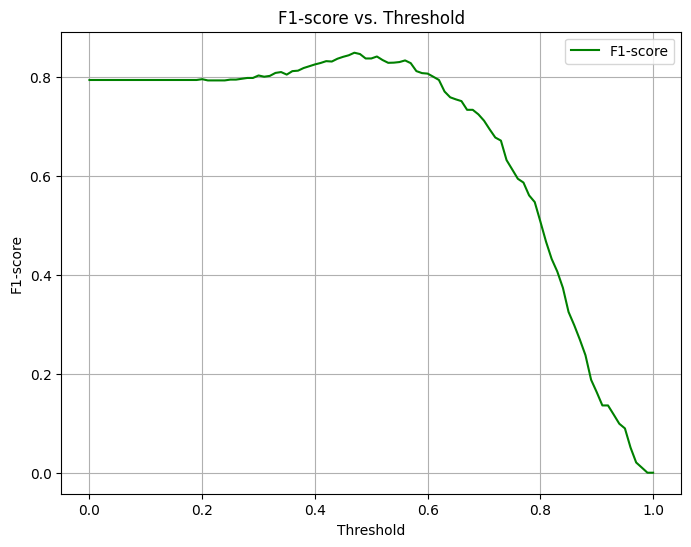

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='green')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
max_f1_threshold = thresholds[np.argmax(f1_scores)]
max_f1_value = max(f1_scores)

print(f"The threshold that maximizes the F1 score is: {max_f1_threshold:.2f} with F1 score = {max_f1_value:.3f}")

The threshold that maximizes the F1 score is: 0.47 with F1 score = 0.848


In [39]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Use the features and target variables from your existing splits
X_full = X_train  # We will use X_train as the dataset for 5-fold CV
y_full = y_train  # Use y_train as the target for 5-fold CV

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Store AUC scores for each fold
auc_scores = []

# Initialize DictVectorizer for one-hot encoding
dv = DictVectorizer(sparse=False)

# Loop through each fold
for train_index, val_index in kf.split(X_full):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_full.iloc[train_index], X_full.iloc[val_index]
    y_train_fold, y_val_fold = y_full.iloc[train_index], y_full.iloc[val_index]

    # Convert to dictionaries for DictVectorizer (one-hot encoding)
    train_dicts = X_train_fold.to_dict(orient='records')
    val_dicts = X_val_fold.to_dict(orient='records')

    # Apply DictVectorizer to get one-hot encoded features
    X_train_encoded = dv.fit_transform(train_dicts)
    X_val_encoded = dv.transform(val_dicts)

    # Initialize the Logistic Regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

    # Train the model on the training set
    model.fit(X_train_encoded, y_train_fold)

    # Get predicted probabilities on the validation set
    y_val_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    # Calculate AUC score on the validation set
    auc = roc_auc_score(y_val_fold, y_val_pred_proba)

    # Append AUC score to the list
    auc_scores.append(auc)

# Step 3: Calculate the standard deviation of AUC scores across folds
std_auc = np.std(auc_scores)

# Output the results
print(f"AUC scores across the 5 folds: {auc_scores}")
print(f"Standard deviation of AUC scores: {std_auc:.4f}")


AUC scores across the 5 folds: [np.float64(0.8117296491940945), np.float64(0.8232421875), np.float64(0.8364), np.float64(0.8392292205924646), np.float64(0.8282666666666666)]
Standard deviation of AUC scores: 0.0098


In [40]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.feature_extraction import DictVectorizer

# Hyperparameter options for C
C_values = [0.000001, 0.001, 1]

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize DictVectorizer for one-hot encoding
dv = DictVectorizer(sparse=False)

# Store results for each value of C
mean_auc_scores = {}
std_auc_scores = {}

# Loop over different C values
for C in C_values:
    auc_scores = []

    # Loop through each fold
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets for this fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Convert to dictionaries for DictVectorizer (one-hot encoding)
        train_dicts = X_train_fold.to_dict(orient='records')
        val_dicts = X_val_fold.to_dict(orient='records')

        # Apply DictVectorizer to get one-hot encoded features
        X_train_encoded = dv.fit_transform(train_dicts)
        X_val_encoded = dv.transform(val_dicts)

        # Initialize the Logistic Regression model with parameter C
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

        # Train the model on the training set
        model.fit(X_train_encoded, y_train_fold)

        # Get predicted probabilities on the validation set
        y_val_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

        # Calculate AUC score on the validation set
        auc = roc_auc_score(y_val_fold, y_val_pred_proba)

        # Append AUC score to the list
        auc_scores.append(auc)

    # Calculate the mean and standard deviation of AUC scores for this value of C
    mean_auc_scores[C] = np.mean(auc_scores)
    std_auc_scores[C] = np.std(auc_scores)

# Output the results: mean and std of AUC for each C value
for C in C_values:
    print(f"C = {C}: Mean AUC = {mean_auc_scores[C]:.3f}, Std AUC = {std_auc_scores[C]:.3f}")

# Find the value of C with the highest mean AUC score
best_C = max(mean_auc_scores, key=mean_auc_scores.get)
print(f"\nBest C value: {best_C} with Mean AUC = {mean_auc_scores[best_C]:.3f}")


C = 1e-06: Mean AUC = 0.548, Std AUC = 0.042
C = 0.001: Mean AUC = 0.872, Std AUC = 0.016
C = 1: Mean AUC = 0.828, Std AUC = 0.010

Best C value: 0.001 with Mean AUC = 0.872
